In [483]:
import pandas as pd

In [484]:
df = pd.read_csv("국가별_데이터_전처리_세계2.csv")

In [485]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

from math import sqrt
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

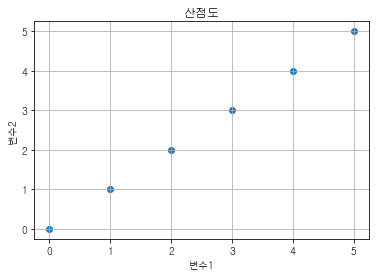

In [486]:
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

### 선형회귀와 비선형회귀 검증
#### 선형회귀
- LinearSVR
- 릿지
- 라쏘
- 엘라스틱넷
---------------------------------
#### 비선형회귀
- 결정 트리
- 랜덤포레스트
- Xgboost
- LightGBM
- 

In [487]:
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [488]:
df2 = df[['CO2 emissions (MMtonnes CO2)']] == 0

In [489]:
df

,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,"Nuclear, renewables, and other (quad Btu)",Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh)
0,0,1980,0.000000,1.325965,0.002479,0.231314,0.111101,0.026583,0.231000,0.00000,...,0.007386,0.983550,0.014624,13356.50,0.711000,0.007386,0.00000,0.00000,0.0,0.0
1,0,1981,0.000000,1.509628,0.002604,0.242977,0.166651,0.029949,0.271000,0.00000,...,0.007537,1.100000,0.016668,13171.68,0.721000,0.007537,0.00000,0.00000,0.0,0.0
2,0,1982,0.000000,1.659605,0.003021,0.281853,0.277752,0.031898,0.245000,0.00000,...,0.007391,1.100000,0.016251,12882.52,0.707000,0.007391,0.00000,0.00000,0.0,0.0
3,0,1983,0.000000,2.059605,0.003021,0.281853,0.277752,0.039022,0.254000,0.00000,...,0.007848,1.500000,0.022918,12537.73,0.746000,0.007848,0.00000,0.00000,0.0,0.0
4,0,1984,0.000000,2.065436,0.003083,0.287684,0.277752,0.039202,0.262000,0.00000,...,0.007903,1.500000,0.022981,12204.31,0.757000,0.007903,0.00000,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,229,2017,0.151000,8.992426,0.060448,5.461868,0.000000,0.154422,3.218560,39.06286,...,0.044062,3.530558,0.049911,14751.10,4.130900,0.044062,0.01100,0.01100,0.0,0.0
9656,229,2018,0.187000,10.290169,0.065284,5.912279,0.000000,0.176781,3.932020,40.89881,...,0.049737,4.377890,0.061759,15052.18,5.254980,0.049737,0.01900,0.01900,0.0,0.0
9657,229,2019,0.189000,9.408047,0.061204,5.468512,0.000000,0.157368,3.850240,38.40398,...,0.040666,3.939535,0.055498,15354.61,4.380599,0.040666,0.02600,0.02600,0.0,0.0
9658,229,2020,0.099000,8.253322,0.052825,4.491685,0.000000,0.143299,3.655663,35.34675,...,0.037482,3.761637,0.052992,15669.67,3.938347,0.037482,0.03400,0.03400,0.0,0.0


In [490]:
df2

,CO2 emissions (MMtonnes CO2)
0,False
1,False
2,False
3,False
4,False
...,...
9655,False
9656,False
9657,False
9658,False


In [491]:
df.describe()

,COUNTRY,Year,Biomass and waste (billion kWh),CO2 emissions (MMtonnes CO2),Coal (quad Btu),Coal and coke (MMtonnes CO2),Consumed natural gas (MMtonnes CO2),Consumption (quad Btu),Fossil fuels (billion kWh),GDP,...,"Nuclear, renewables, and other (quad Btu)",Petroleum and other liquids (MMtonnes CO2),Petroleum and other liquids (quad Btu),Population,Renewables (billion kWh),Renewables and other (quad Btu),Solar (billion kWh),"Solar, tide, wave, fuel cell (billion kWh)",Tide and wave (billion kWh),Wind (billion kWh)
count,9660.00000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,...,9660.000000,9660.000000,9660.000000,9.660000e+03,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000
mean,114.50000,2000.500000,2.073410,232.578126,1.049387,99.796681,44.390043,3.787541,90.690231,625.642962,...,0.522760,88.391402,1.379538,5.305504e+04,30.711509,0.324916,0.998843,1.005471,0.006628,2.672044
std,66.39809,12.121546,21.143353,1880.749682,9.107460,865.824852,363.886693,30.525783,764.643922,5344.248527,...,4.310244,692.845906,10.851800,4.240884e+05,267.051964,2.754344,19.047750,19.073880,0.065737,40.616540
min,0.00000,1980.000000,0.000000,0.000000,0.000000,-0.005130,0.000000,0.000000,0.000000,0.000000,...,-0.168214,0.000000,0.000000,0.000000e+00,0.000000,-0.168214,0.000000,0.000000,0.000000,0.000000
25%,57.00000,1990.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.008079,0.063630,0.000000,...,0.000000,0.484886,0.006991,1.709688e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,114.50000,2000.500000,0.000000,4.299291,0.000000,0.000081,0.000000,0.092087,0.872160,17.212815,...,0.004995,3.061781,0.043368,3.989538e+03,0.354500,0.004573,0.000000,0.000000,0.000000,0.000000
75%,172.00000,2011.000000,0.049000,43.280036,0.032710,3.333108,6.440262,0.788267,14.704384,143.551025,...,0.073468,23.769775,0.350614,1.576925e+04,5.338566,0.055075,0.001000,0.001000,0.000000,0.000325
max,229.00000,2021.000000,639.969020,35655.030690,173.359051,16460.029080,7948.649507,603.320807,16832.819160,131934.428000,...,100.872893,12188.747950,198.201126,7.907777e+06,7801.504076,72.842014,1036.244409,1037.218409,1.348000,1807.798762


In [492]:
df.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)'],
      dtype='object')

### 테스트 데이터 분리

In [493]:
# ['COUNTRY','CO2 emissions (MMtonnes CO2)', 'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)','CO2 emissions (MMtonnes CO2)','Generation (billion kWh)','Consumption (quad Btu)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)','Petroleum and other liquids (MMtonnes CO2)','Renewables (billion kWh)']
#X = df.drop(['CO2 emissions (MMtonnes CO2)'], axis=1)
# 'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)', 'Petroleum and other liquids (MMtonnes CO2)', 'CO2 emissions (MMtonnes CO2)'
X = df.drop(['Year','COUNTRY','CO2 emissions (MMtonnes CO2)', 'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)','CO2 emissions (MMtonnes CO2)','Generation (billion kWh)','Consumption (quad Btu)','Non-hydroelectric renewables (billion kWh)','Solar, tide, wave, fuel cell (billion kWh)','Nuclear, renewables, and other (quad Btu)','Petroleum and other liquids (MMtonnes CO2)','Renewables (billion kWh)'], axis=1)
y = df['CO2 emissions (MMtonnes CO2)']
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle = False)

In [494]:
X.head()

,Biomass and waste (billion kWh),Coal (quad Btu),Fossil fuels (billion kWh),GDP,Geothermal (billion kWh),Hydroelectric pumped storage (billion kWh),Hydroelectricity (billion kWh),Natural gas (quad Btu),Nuclear (billion kWh),Nuclear (quad Btu),Petroleum and other liquids (quad Btu),Population,Renewables and other (quad Btu),Solar (billion kWh),Tide and wave (billion kWh),Wind (billion kWh)
0,0.0,0.002479,0.231,0.0,0.0,0.0,0.711,0.002094,0.0,0.0,0.014624,13356.50,0.007386,0.0,0.0,0.0
1,0.0,0.002604,0.271,0.0,0.0,0.0,0.721,0.003141,0.0,0.0,0.016668,13171.68,0.007537,0.0,0.0,0.0
2,0.0,0.003021,0.245,0.0,0.0,0.0,0.707,0.005235,0.0,0.0,0.016251,12882.52,0.007391,0.0,0.0,0.0
3,0.0,0.003021,0.254,0.0,0.0,0.0,0.746,0.005235,0.0,0.0,0.022918,12537.73,0.007848,0.0,0.0,0.0
4,0.0,0.003083,0.262,0.0,0.0,0.0,0.757,0.005235,0.0,0.0,0.022981,12204.31,0.007903,0.0,0.0,0.0


In [495]:
y

0        1.325965
1        1.509628
2        1.659605
3        2.059605
4        2.065436
          ...    
9655     8.992426
9656    10.290169
9657     9.408047
9658     8.253322
9659     8.118910
Name: CO2 emissions (MMtonnes CO2), Length: 9660, dtype: float64

In [496]:
# 코드 10-2
# 스탯츠모델스, 사이킷런 ==========
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression

# 선형 회귀모형 형태(종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3 + ···)
# 단순 선형 회귀분석 ==========

fit = ols('y~X', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.217e+07
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:07:39   Log-Likelihood:                -38655.
No. Observations:                9660   AIC:                         7.734e+04
Df Residuals:                    9643   BIC:                         7.747e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0320      0.136      0.235      0.8

In [497]:
# alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 100]

# for alpha in alphas:
#     model = LinearSVR(epsilon=alpha, random_state=43)
#     model.fit(X_train, y_train) # 모델 학습ㄴ
    
    
#     # Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
#     pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
#     mean_absolute_error(y_test, pred)
#     np.sqrt(mean_squared_error(y_test, pred))

#     mae = mean_absolute_error(y_test, pred)
#     rmse = np.sqrt(mean_squared_error(y_test, pred))

#     # MAE 및 RMSE를 백분율로 표시
#     mae_percentage = (mae / np.mean(y_test)) * 100
#     rmse_percentage = (rmse / np.mean(y_test)) * 100

#     print("MAE: {:.2f}%".format(mae_percentage))
#     print("RMSE: {:.2f}%".format(rmse_percentage))

#     r2_score(y_test, pred)
    
        
#         # Feature importance, feature 선언
#     importances = model.coef_
#     features = X.columns

#     # 중요한 변수 순으로 정렬
#     indices = np.argsort(importances)
#     sorted_features = [features[i] for i in indices]

#     # 그래프 크기 지정
#     plt.title(alpha)
#     plt.figure(figsize=(10, 8))

#     # 막대그래프 show
#     plt.barh(sorted_features, importances[indices])
#     plt.show()

### 1. LinearSVR 모델 학습

In [498]:
model = LinearSVR(epsilon=0.5, random_state=43)
model.fit(X_train, y_train) # 모델 학습ㄴ

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(epsilon=0.5, random_state=43)

### 1. LinearSVR 모델 검증

In [499]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 16.08%
RMSE: 83.98%


0.9809915646180452

### 1. LinearSVR 중요변수 확인

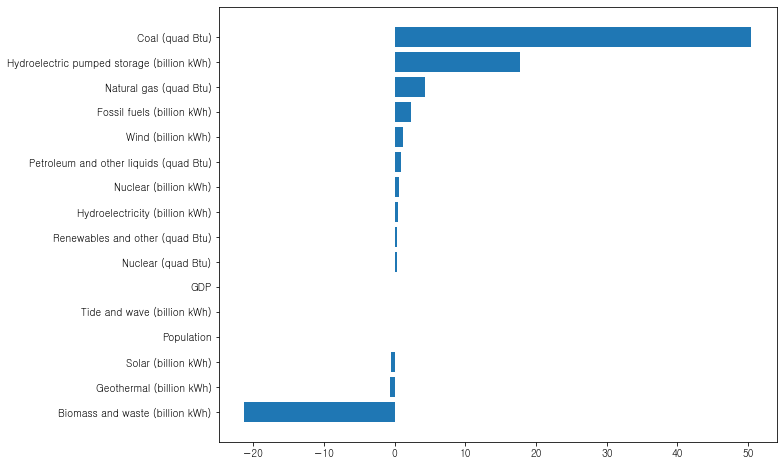

In [500]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

### 2. 릿지 회귀 학습

In [501]:
model = Ridge(alpha=0.5) 
model.fit(X_train, y_train) # 모델 학습

Ridge(alpha=0.5)

### 2. 릿지 회귀 모델 검증

In [502]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 2.33%
RMSE: 11.46%


0.9996457268887702

In [503]:
# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 테스트 데이터에 대한 성능 확인
test_mae = mean_absolute_error(y_test, pred)
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Test MAE: {:.2f}".format(mae))
print("Test RMSE: {:.2f}".format(rmse))


Train MAE: 2.36
Train RMSE: 7.15
Test MAE: 12.62
Test RMSE: 62.19


### 2. 릿지회귀 중요변수 확인

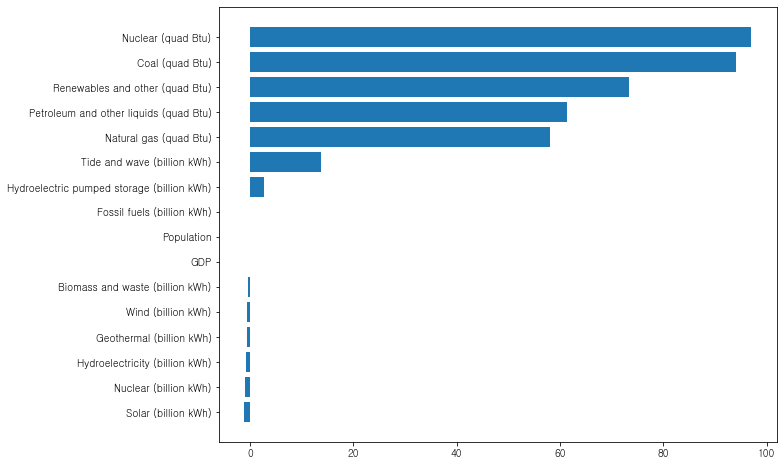

In [504]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 3. 라쏘 회귀 모델 학습

In [505]:
model = Lasso(alpha=0.5) 
model.fit(X_train, y_train) # 모델 학습

Lasso(alpha=0.5)

### 3. 라쏘 회귀 모델 검증

In [506]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 1.56%
RMSE: 7.06%


0.9998655059754192

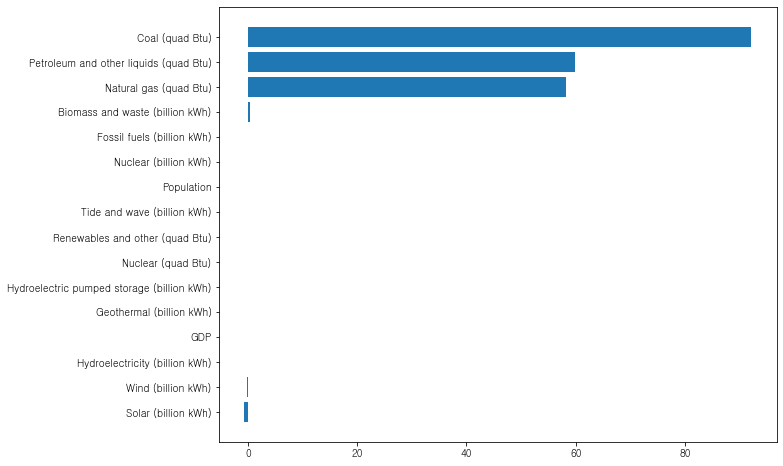

In [507]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

In [508]:
# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 테스트 데이터에 대한 성능 확인
test_mae = mean_absolute_error(y_test, pred)
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Test MAE: {:.2f}".format(mae))
print("Test RMSE: {:.2f}".format(rmse))


Train MAE: 2.62
Train RMSE: 7.87
Test MAE: 8.44
Test RMSE: 38.32


### 4. 엘라스틱넷 회귀 모델 학습

In [509]:
model = ElasticNet(alpha=0.5, l1_ratio=0.5) 
model.fit(X_train, y_train) # 모델 학습

ElasticNet(alpha=0.5)

### 4. 엘라스틱넷  회귀 모델 검증

In [510]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 6.01%
RMSE: 26.59%


0.9980935788872685

### 4. 엘라스틱넷 회귀 중요변수 확인


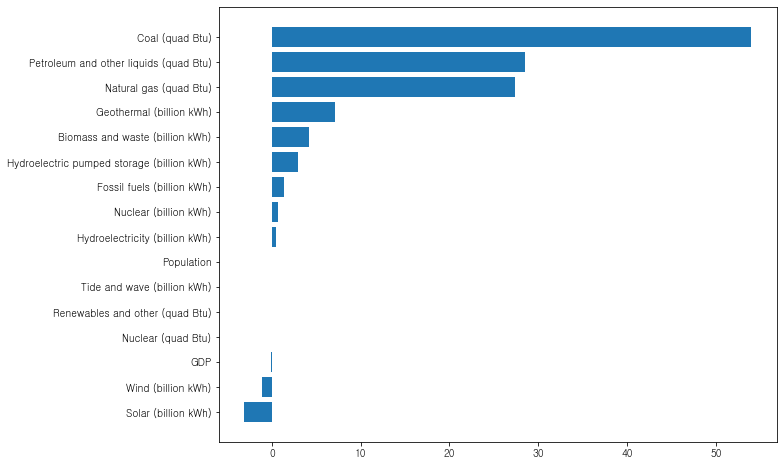

In [511]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

In [512]:
# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))

# 테스트 데이터에 대한 성능 확인
test_mae = mean_absolute_error(y_test, pred)
test_rmse = np.sqrt(mean_squared_error(y_test, pred))

print("Test MAE: {:.2f}".format(mae))
print("Test RMSE: {:.2f}".format(rmse))


Train MAE: 12.81
Train RMSE: 32.45
Test MAE: 32.57
Test RMSE: 144.26


### 1. (비선형) 결정 트리 회귀 모델 학습

In [513]:
model = DecisionTreeRegressor(random_state=3) 
model.fit(X_train, y_train) # 모델 학습

DecisionTreeRegressor(random_state=3)

### 1. (비선형) 결정 트리 회귀 모델 검증

In [514]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 47.24%
RMSE: 363.02%


0.6447952262571646

### 1. (비선형) 결정 트리 회귀 중요변수 확인

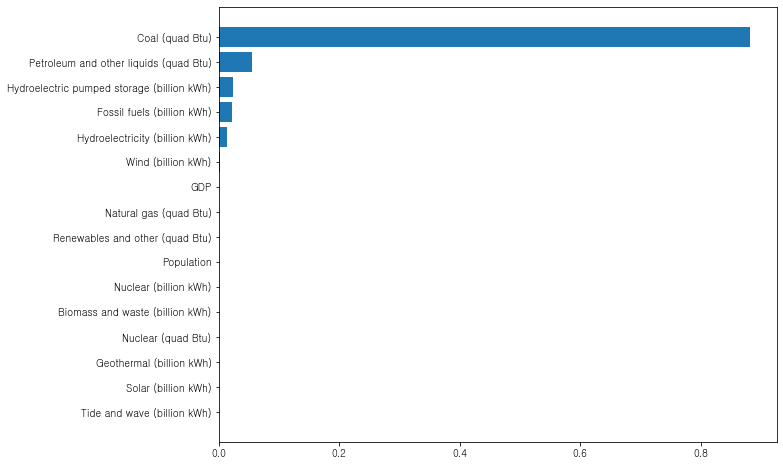

In [515]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 2. (비선형) 랜덤포레스트 회귀 모델 학습

In [516]:
model = RandomForestRegressor(n_estimators=100, random_state=4) 
model.fit(X_train, y_train) # 모델 학습

RandomForestRegressor(random_state=4)

### 2. (비선형) 랜덤포레스트 회귀 모델 검증

In [517]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 46.98%
RMSE: 373.52%


0.6239354021886145

### 2. (비선형) 랜덤포레스트 회귀 중요변수 확인

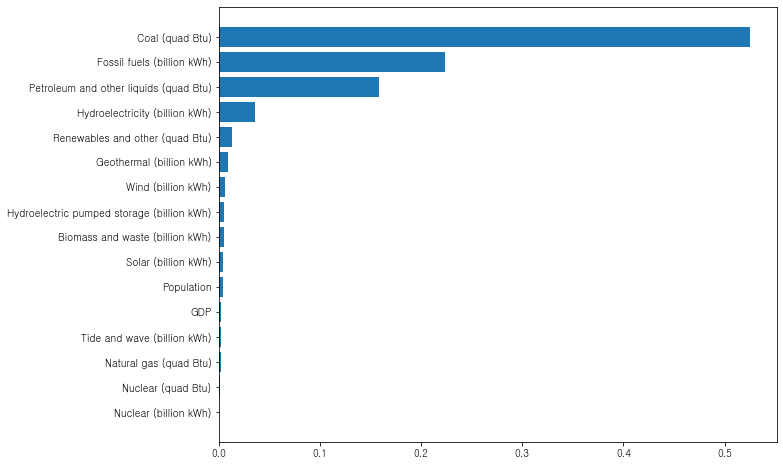

In [518]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 3. (비선형) XGBoost 회귀 모델 학습

In [519]:
model = XGBRegressor() 
model.fit(X_train, y_train) # 모델 학습

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### 3. (비선형) XGBoost 회귀 모델 검증

In [520]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 46.65%
RMSE: 369.87%


0.6312615173113055

### 3. (비선형) XGBoost 회귀 중요변수 확인

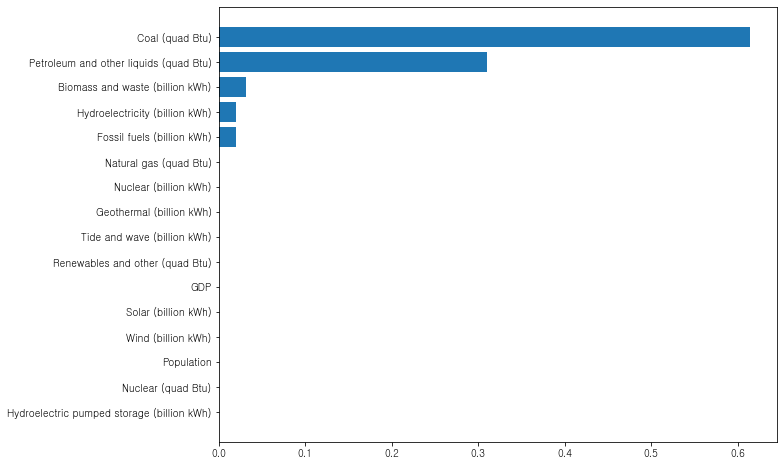

In [521]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 4. (비선형) LightGBM 회귀 모델 학습

In [522]:
'''
   LightGBM에서는 특수 문자나 공백이 포함된 변수명을 지원하지 않습니다.
   따라서 'X_train'에서 특수 문자나 공백을 제거하거나, 변수명을 변경해야 합니다.
'''
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]


model = LGBMRegressor(force_col_wise=True) 
model.fit(X_train, y_train) # 모델 학습

[LightGBM] [Info] Total Bins 3774
[LightGBM] [Info] Number of data points in the train set: 6762, number of used features: 16
[LightGBM] [Info] Start training from score 99.781292


LGBMRegressor(force_col_wise=True)

### 4. (비선형) LightGBM 회귀 모델 검증

In [523]:
'''
   LightGBM에서는 특수 문자나 공백이 포함된 변수명을 지원하지 않습니다.
   따라서 'X_train'에서 특수 문자나 공백을 제거하거나, 변수명을 변경해야 합니다.
'''
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
model = LGBMRegressor(force_col_wise=True)
model.fit(X_train, y_train) # 모델 학습

[LightGBM] [Info] Total Bins 3774
[LightGBM] [Info] Number of data points in the train set: 6762, number of used features: 16
[LightGBM] [Info] Start training from score 99.781292


LGBMRegressor(force_col_wise=True)

In [524]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

MAE: 51.63%
RMSE: 386.81%


0.5967082997487236

### 4. (비선형) LightGBM 회귀 중요변수 확인

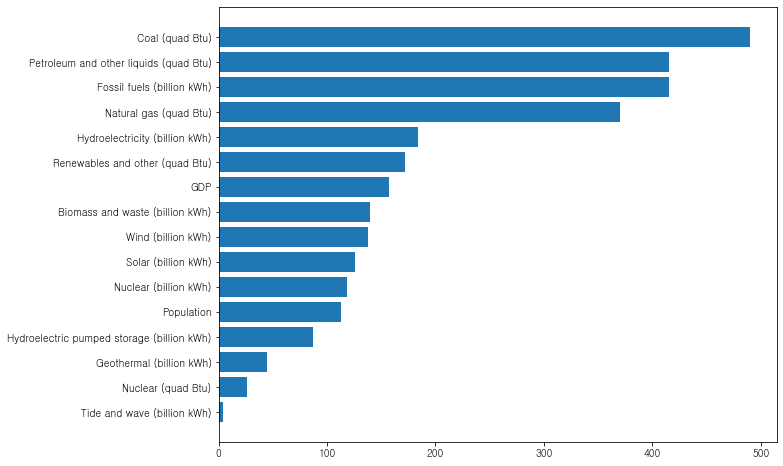

In [525]:
# Feature coefficients, feature 선언
coefficients = model.feature_importances_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

### 5. (비선형) LightGBM 회귀 중요변수 확인

In [526]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3, weights='distance') 
model.fit(X_train, y_train) # 모델 학습



KNeighborsRegressor(n_neighbors=3, weights='distance')

In [527]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model.predict(X_test)    # X_test를 이용한 예측값 pred 
mean_absolute_error(y_test, pred)
np.sqrt(mean_squared_error(y_test, pred))

mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

# MAE 및 RMSE를 백분율로 표시
mae_percentage = (mae / np.mean(y_test)) * 100
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("MAE: {:.2f}%".format(mae_percentage))
print("RMSE: {:.2f}%".format(rmse_percentage))

r2_score(y_test, pred)

C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Biomass and waste (billion kWh)
- Coal (quad Btu)
- Fossil fuels (billion kWh)
- Geothermal (billion kWh)
- Hydroelectric pumped storage (billion kWh)
- ...
Feature names seen at fit time, yet now missing:
- Biomass_and_waste__billion_kWh_
- Coal__quad_Btu_
- Fossil_fuels__billion_kWh_
- Geothermal__billion_kWh_
- Hydroelectric_pumped_storage__billion_kWh_
- ...

  warnings.warn(message, FutureWarning)


MAE: 63.62%
RMSE: 386.38%


0.5976049243332147